In [5]:
def metric_dimension_tree(G):
    
    n = G.num_verts()
    
    # preverimo ali je drevo tudi pot, takrat je metrična dimenzija enaka 1
    ones = 0
    twos = 0
    degrees = G.degree()
    for i in degrees:
        if i == 1:
            ones += 1
        if i == 2:
            twos += 1
    if [ones, twos] == [2, n-2]:  # pot ima natanko dve vozlišči stopnje 1, ostala so stopnje 2
        return 1
    
    D = G.distance_matrix()  # matrika razdalj med vsakima dvema vozliščema
    
    # izkoristimo teorijo: za sode premere grafa je podana eksplicitna izražava
    diameter = D.numpy().max()   # premer grafa je maksimalna razdalja med vozliščema v grafu
    if D%2 == 0:
        print(diameter)
        return 4*(2*n - diameter - 2)/diameter/(diameter + 2)
    
    # od tu tako kot prej
    p = MixedIntegerLinearProgram(maximization = False)
    x = p.new_variable(binary = True)
    for u, v in Combinations(range(n), 2):
        p.add_constraint(sum(x[w] for w in range(n)
                             if D[u, w] != D[v, w]) >= 1)
    p.set_objective(sum(x[w] for w in range(n)))
    return p.solve()

In [7]:
def metric_dimension(G):
    n = G.num_verts()
    D = G.distance_matrix()
    p = MixedIntegerLinearProgram(maximization = False)
    x = p.new_variable(binary = True)
    for u, v in Combinations(range(n), 2):
        p.add_constraint(sum(x[w] for w in range(n)
                             if D[u, w] != D[v, w]) >= 1)
    p.set_objective(sum(x[w] for w in range(n)))
    return p.solve()

In [9]:
def fractional_metric_dimension(G):
    n = G.num_verts()
    D = G.distance_matrix()
    p = MixedIntegerLinearProgram(maximization = False)
    x = p.new_variable(real=True, nonnegative=True)
    p.set_max(x,1)
    for u, v in Combinations(range(n), 2):
        p.add_constraint(sum(x[w] for w in range(n)
                             if D[u, w] != D[v, w]) >= 1)
    p.set_objective(sum(x[w] for w in range(n)))
    return p.solve()

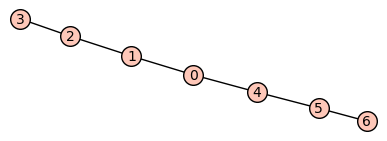

None
1.0
1.0
-----


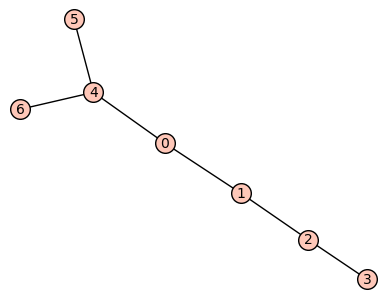

None
2.0
1.5
-----


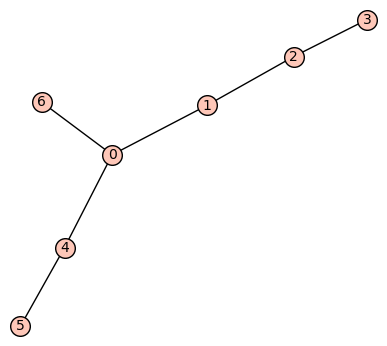

None
2.0
1.5
-----


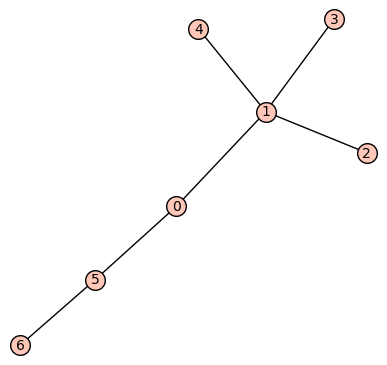

None
3.0
2.0
-----


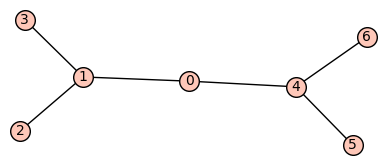

None
2.0
2.0
-----


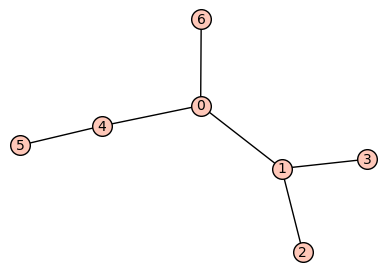

None
2.0
2.0
-----


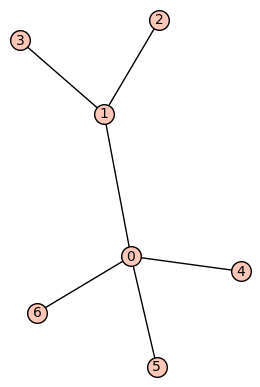

None
3.0
2.5
-----


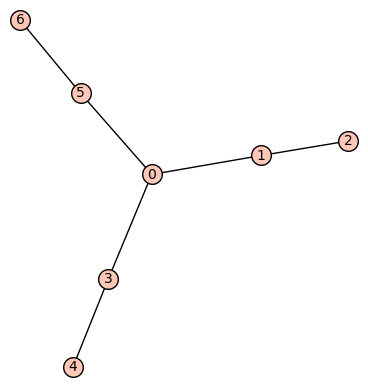

None
2.0
1.5
-----


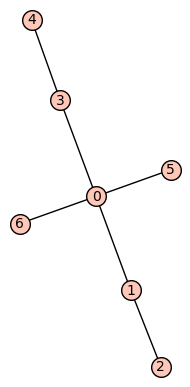

None
3.0
2.0
-----


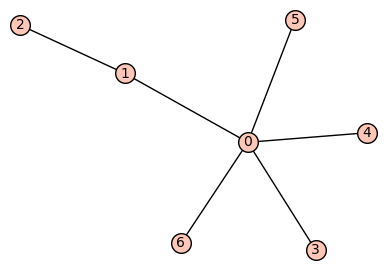

None
4.0
2.5
-----


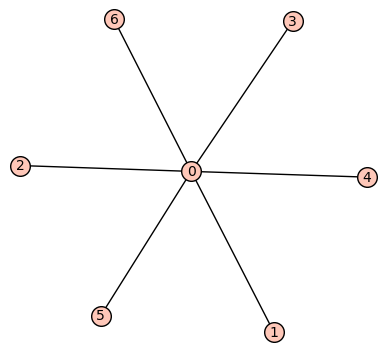

None
5.0
3.0
-----


In [6]:
# zgornja programa preiskusimo na vseh drevesih s 7 vozlišči
trees = graphs.trees(7)
for g in trees:
    print(g.show())
    print(metric_dimension(g))
    print(metric_dimension_tree(g))
    print(fractional_metric_dimension(g))
    print('-----')

In [4]:
# from sage.graphs.trees import TreeIterator

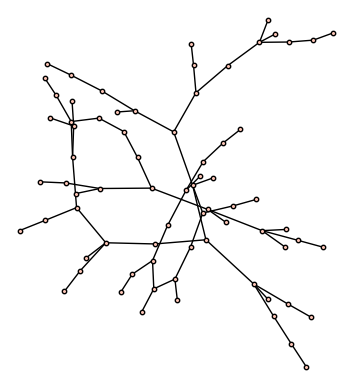

In [3]:
G = graphs.RandomTree(73)
G.show(vertex_size=10, vertex_labels=False)

In [6]:
metric_dimension_tree(G)

11.0

In [8]:
metric_dimension(G)

11.0

In [10]:
fractional_metric_dimension(G)

9.5

#### 